# Linear Regression

This notebook implements the custom linear regression algorithm on the Breast Cancer Wisconsin dataset. Here, linear regression is used to predict tumor concavity given data for various numerical features relating to tumor characteristics. The objective of this task is to validate the use of the custom linear regression model, and evaluate its performance for a multi-feature regression problem.

The following sections are included in this notebook:
1. **Library Imports**
- Importing the necessary modules, packages, and libraries
- Specifies dependencies and preferred versions
2. **Data Loading and Cleaning**
- Loads the Breast Cancer Wisconsin dataset with relevant features
- Drops outliers, duplicates, and missing data
- Creates arrays for the features and target variable
3. **Data Visualization**
- Visualizes the correlation between features using a heatmap
- Visualizes the distribution of the selected feature and target on a 2D plot
4. **Linear Regression Implementation (1 Feature)**
- Implements the custom-built linear regression with one input feature using both the normal equation and gradient descent
- Visualizes the regression results
- Evaluates the results across multiple metrics  
5. **Linear Regression Implementation (Changing Parameters)**
- Implements the custom-built linear regression with various parameters (number of epochs, learning rate)
- Examines the effect on model performance
6. **Linear Regression Implementation (Multiple Features)**
- Implements the custom-built linear regression with more than two features to ensure functionality
- Evaluates the results across multiple metrics
7. **Comparison with Existing Models**
- Runs the scikit-learn version of linear regression
- Compares the results with the custom-built class to verify the latter

*For a more comprehensive overview of the linear regression algorithm, code structure, and metrics used, see the associated [README](README.md).*

### Library Imports
This section imports the packages and modules required to run linear regression. The following dependencies (with recommended versions) are required:
- Python 3.9.6
- Numpy 1.26.4
- Pandas 2.3.3
- Matplotlib 3.9.4
- Seaborn 0.13.2
- Sklearn 1.6.1

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.supervised_learning.regression import *
from rice_ml.postprocess.regressionpost import *
import sklearn

### Data Loading & Cleaning
*Loading, preprocessing, and dividing data*

The data used in this notebook comes from Breast Cancer Wisconsin. Although this dataset is more commonly used for classification, it contains a series of continuous numeric features that can be applied to evaluating regression algorithms. It has been selected for its number of features and clear relationships, and because it allows for several data cleaning steps that showcase the `rice_ml` preprocessing modules. The features of interest in this example are *mean concavity* (target variable for regression), as well as a range of numeric features relating to other tumor characteristics.

The data is first loaded as a Pandas DataFrame.

In [74]:
# Loading the data
cancer_data = sklearn.datasets.load_breast_cancer(as_frame = True)
cancer_data = cancer_data.frame
display(cancer_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


To ensure that the dataset does not contain missing data, we apply a series of preprocessing steps using functions from the `preprocessing` package, including dropping any rows with missing values or that are identified to be duplicates of another.

In [75]:
# Cleaning the dataset (dropping rows that are duplicates or contain missing data)
cancer_data_missing = missing_data(cancer_data, 'drop')
cancer_data_cleaned = duplicate_identify(cancer_data_missing, True)

We then split the dataset into the target variable and the other features. The target variable for regression in this dataset is *mean concavity*.

In [76]:
cancer_features = cancer_data_cleaned[:, [0, 1, 2, 3, 4, 5, 7, 8]]
cancer_concavity = cancer_data_cleaned[:, 6]
print(f"Array for concavity (first five rows, first five features): \n {cancer_features[0:5, 0:5]} \n \n \
Array for concavity (first five rows): \n {cancer_concavity[0:5]}")

Array for concavity (first five rows, first five features): 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01]] 
 
 Array for concavity (first five rows): 
 [0.3001 0.0869 0.1974 0.2414 0.198 ]


### Data Visualization
*Correlations and feature plotting*

Once the data has been appropriately cleaned, the relationships between variables can be visualized using a set of methods. We first visualize the correlations between features using a heatmap of a calculated correlation matrix, applied to the cleaned DataFrame that includes all possibly relevant features. Doing so allows for the identification of features that are correlated with the target, and may thus be appropriate for regression using linear regression.

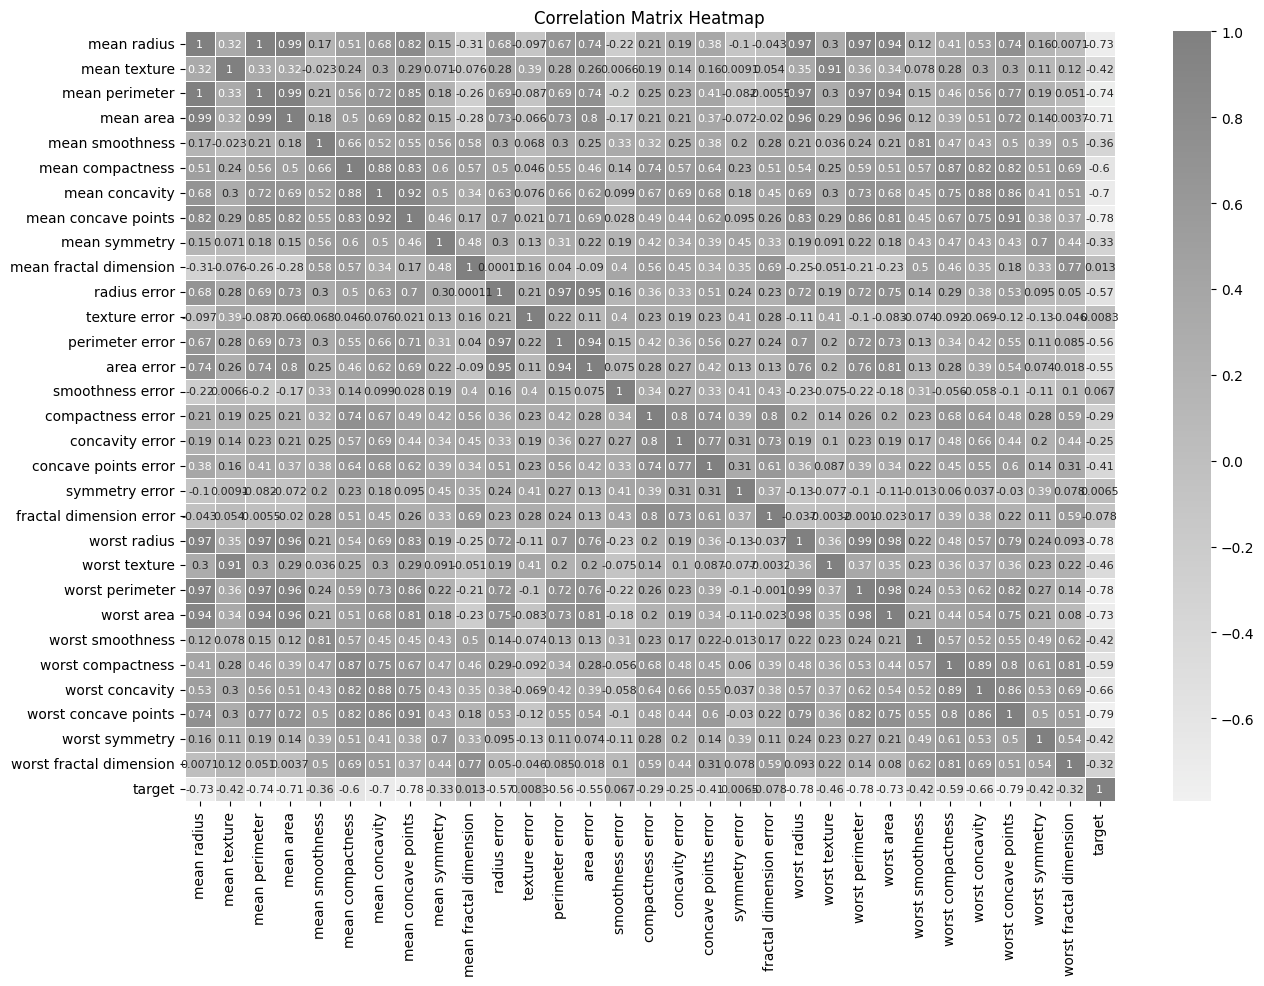

In [77]:
# Creating and plotting a correlation matrix with a heatmap
correlation_matrix = (pd.DataFrame(cancer_data_cleaned, columns = cancer_data.columns)).corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8}, cmap = sns.light_palette('gray', as_cmap=True), linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The target feature (*mean concavity*) is correlated with *mean perimeter* (0.72), so this is likely a suitable relationship for linear regression. We select the mean perimeter as the input feature. To visualize the relationship between the two varianbes (*mean concavity* and *mean perimeter*), we can create a two-dimensional plot of mean concavity versus mean perimeter.


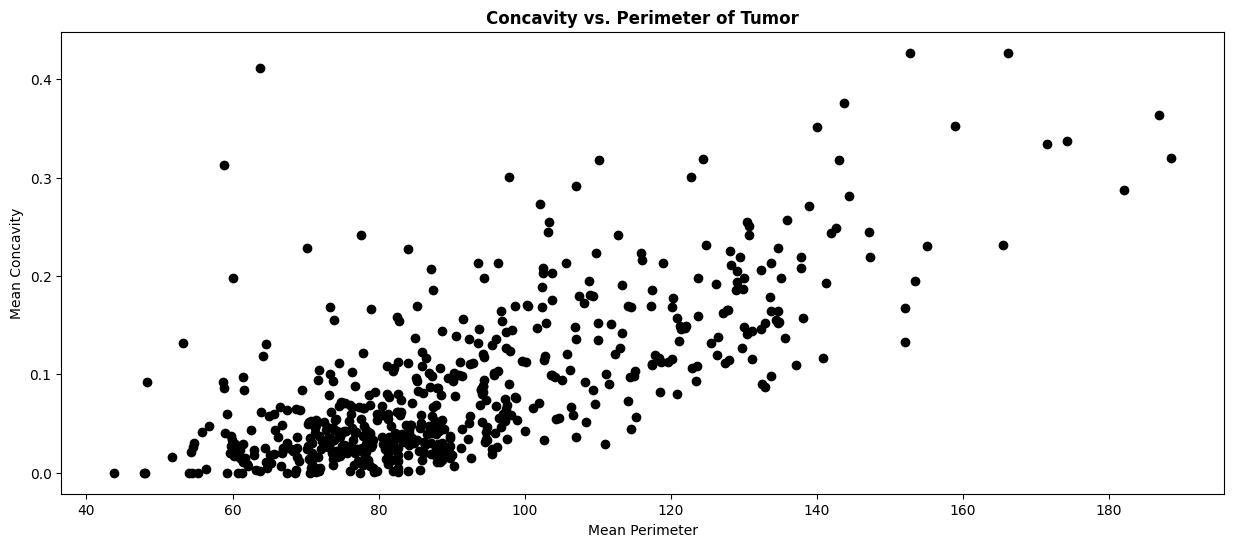

In [78]:
# Plotting mean perimeter and concavity
plt.figure(figsize = (15, 6))
plt.scatter(cancer_features[:, 2], cancer_concavity, color = 'black')    
plt.title("Concavity vs. Perimeter of Tumor", fontweight = 'bold')
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Concavity")
plt.show()

There seems to be a fairly linear relationship between the two variables. As mean perimeter of a tumor increases, so does mean concavity. The distribution of this data suggests that it will be a suitable problem for approaching with linear regression.

### Linear Regression Implementation (1 Feature)
*Regression using linear regression with one feature*

This section implements the custom linear regression class to predict tumor concavity based on perimeter. It carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the linear regression, we normalize the feature data using z-scores, calculated using the `preprocessing` package. This reduces the possibility that the relative scale of the feature will impact model results, and is standard practice in supervised learning. Feature normalization rescales each feature to prevent skewing results based on feature magnitude, ensuring that no one feature will overly contribute to model predictions. Given that there is only one feature in this instance, the standardizing step is not strictly necessary, but is good practice.

In [79]:
# Standardizing the data
cancer_perimeter_normal = z_score_standardize(cancer_features[:, 2].reshape(-1, 1))
print(f"Standardized feature data (first five rows): \n {cancer_perimeter_normal[0:5, :]}")

Standardized feature data (first five rows): 
 [[ 1.26993369]
 [ 1.68595471]
 [ 1.56650313]
 [-0.59268717]
 [ 1.77657315]]


Once the data has been scaled, it is split into testing and training arrays. This ensures that the model is not trained and tested on the same set of data, allowing for unbiased evaluation of model performance and preventing overfitting. The data is split in a 70/30 proportion such that the training data is 70% of the total dataset, and the testing data 30%. There are 569 samples in the cleaned dataset, so the training array should have approximately 398 samples and the testing should have 171. Because this is a regression problem with no class labels, stratification is not applicable, and the basic `train_test` function is used.

In [80]:
# Splitting the data into training and testing arrays
train_array, test_array, train_targets, test_targets = train_test(cancer_perimeter_normal, cancer_concavity, random_state = 438)

# Verifying sizes of each array
print(f"Shape of training array: {train_array.shape}")
print(f"Shape of training targets: {train_targets.shape}")
print(f"Shape of testing array: {test_array.shape}")
print(f"Shape of testing targets: {test_targets.shape}")

Shape of training array: (398, 1)
Shape of training targets: (398,)
Shape of testing array: (171, 1)
Shape of testing targets: (171,)


We now perform regression using linear regression by creating an instance of the `linear_regression` class from the supervised learning package, and fitting it on the training data. The previously unseen test data is then provided to the fitted model to predict the tumor type labels. Because linear regression can be calculated using either the normal equation or gradient descent, we create and fit both models to compare performance.

The first linear regressor has the following specifications:
- **Method:** Normal
- **Fit Intercept:** True

The second linear regressor has the following specifications:
- **Method:** Gradient Descent
- **Fit Intercept:** True
- **Epochs:** 1000
- **Learning Rate:** 0.001

In [81]:
# Fitting the first model
reg_normal = linear_regression('normal')
reg_normal.fit(train_array, train_targets)

# Predicting the concavity of testing data
prediction_normal = reg_normal.prediction(test_array)
coef_normal = reg_normal.coef_
int_normal = reg_normal.intercept_

In [82]:
# Fitting the second model
reg_gd = linear_regression('gradient_descent', epochs = 1000, learning_rate = 0.001)
reg_gd.fit(train_array, train_targets)

# Predicting the concavity of testing data
prediction_gd = reg_gd.prediction(test_array)
coef_gd = reg_gd.coef_
int_gd = reg_gd.intercept_

When the model has been successfully fitted and returns the concavity predictions for the test data, we evaluate its performance using a variety of visualization and scoring methods. These include plotting the best-fit line, finding the MSE per epoch (gradient descent), and calculating the MAE, MSE, RMSE, R2, and adjusted R2. For a description of these metrics, see this [README](README.md).

The plot below is a visualization of best-fit line for gradient descent and the normal equation. The data points are the concavity against perimeter for all samples in the data.

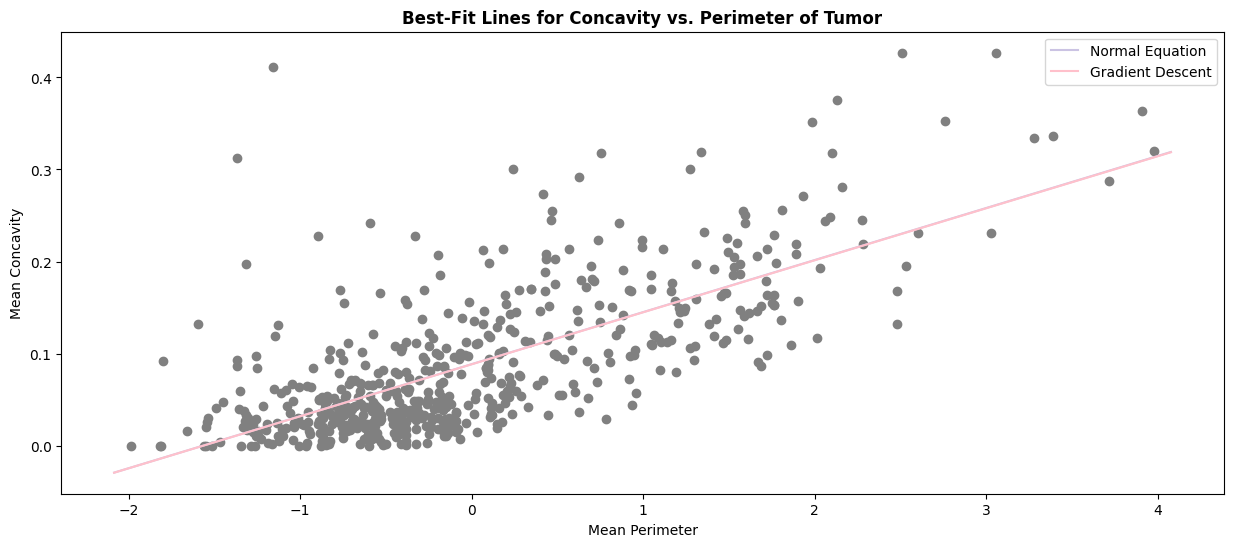

In [83]:
# Plotting mean perimeter and concavity with the best-fit line
x = np.linspace(cancer_perimeter_normal.min() - 0.1, cancer_perimeter_normal.max() + 0.1, 100)
y_normal = coef_normal * x + int_normal
y_gd = coef_gd * x + int_gd
plt.figure(figsize = (15, 6))
plt.scatter(cancer_perimeter_normal, cancer_concavity, color = 'gray')  
plt.plot(x, y_normal, color = '#CBC3E3', label = 'Normal Equation')  
plt.plot(x, y_gd, color = 'pink', label = 'Gradient Descent') 
plt.title("Best-Fit Lines for Concavity vs. Perimeter of Tumor", fontweight = 'bold')
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Concavity")
plt.legend()
plt.show()

The best-fit line created using linear regression appears to be a fairly accurate representation of the linear relationship between the two features. In addition, the coefficients and intercept found using gradient descent almost exactly matches those found directly with the normal equation, which validates the gradient descent method of the custom class. Because gradient descent is the focus of many machine learning algorithms and can be applied to more complex linear regression problems, we will use gradient descent as the method of choice in the remaining analysis.

For gradient descent, we can call and plot the mean-squared error for each epoch, which should provide an indicator of model learning efficiency.

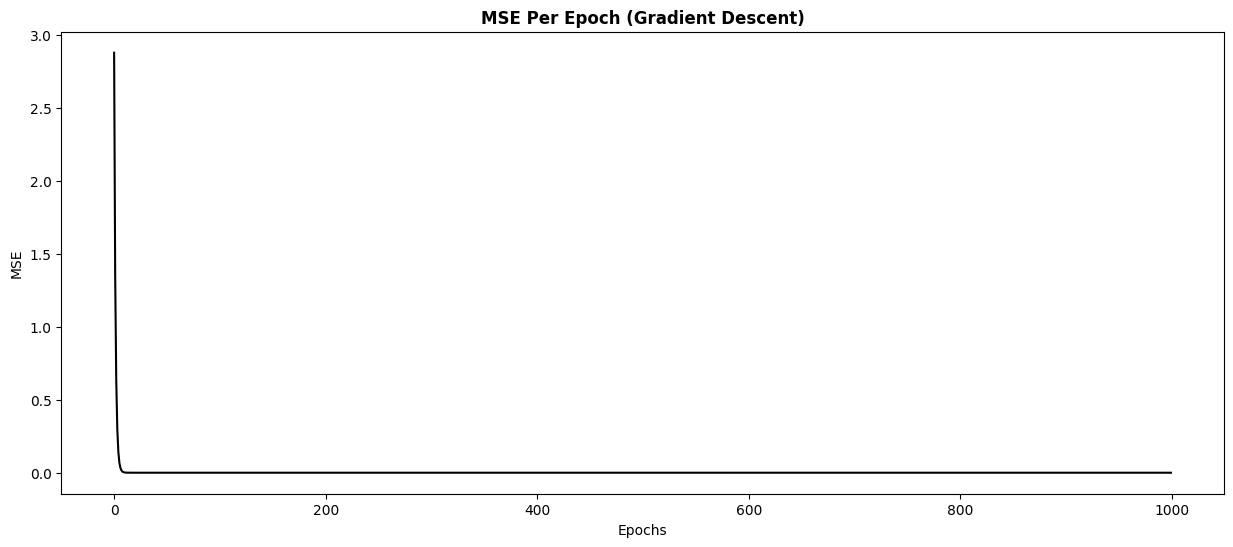

In [84]:
# Plotting MSE per epoch for gradient descent
error = reg_gd.error_
epochs = np.arange(reg_gd.epochs)
plt.figure(figsize = (15, 6))
plt.plot(epochs, error, color = 'black')  
plt.title("MSE Per Epoch (Gradient Descent)", fontweight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

The graph of MSE across epochs indicates that the model is successfully learning. The error is very high as the model begins, but quickly decreases to around 0, and does not change for the remainder of the iterations. This suggests that the model is learning appropriately, as would be expected using gradient descent.

We can calculate various model metrics for both the normal and gradient descent version of linear regression.

In [85]:
# Evaluating the model for the normal equation
print_model_metrics(prediction_normal, test_targets, n_features = 1)

Model Metrics 
------------- 
MAE: 0.04 
MSE: 0.00 
RMSE: 0.06 
R2: 0.56 
Adjusted R2: 0.56


In [86]:
# Evaluating the model for the gradient descent version
print_model_metrics(prediction_gd, test_targets, n_features = 1)

Model Metrics 
------------- 
MAE: 0.04 
MSE: 0.00 
RMSE: 0.06 
R2: 0.56 
Adjusted R2: 0.56


The two linear regression models are fair predictors of concavity from tumor perimeter. They perform very similarly, with identical metrics that suggest either method is acceptable for this problem. In addition, the MAE, MSE, and RMSE are very low (likely partially a consequence of the scale of the data, but nevertheless indicative of a generally successful model). The R2 and adjusted R2 are moderately high (~0.56).

### Linear Regression Implementation (Changing Parameters)
*Altering number of epochs and learning rate*

This section implements the custom linear regression with gradient descent for predicting tumor concavity from tumor perimeter, but systematically changes a parameter in the model to determine the effects on performance. It first evaluates the model for different numbers of epochs, using R2 as the primary metric.

In [87]:
# Arrays for maximum epochs and R2
epoch_values = np.arange(1, 1050, 50)
r2_epochs = np.full(len(epoch_values), np.nan)

# Fitting and scoring the model for each set of epochs
for i in range(len(epoch_values)):
    reg = linear_regression('gradient_descent', epochs = int(epoch_values[i]), learning_rate = 0.001)
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    r2_score = reg.scoring(test_array, test_targets)
    r2_epochs[i] = r2_score

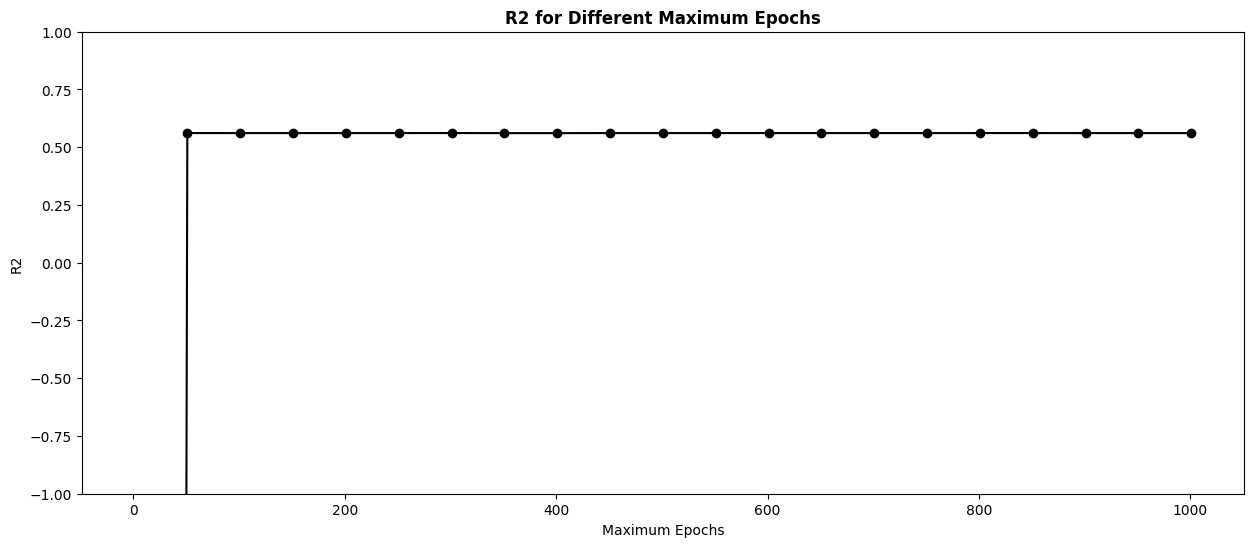

In [88]:
# Plotting the change in R2 across different maximum epochs
plt.figure(figsize = (15, 6))
plt.plot(epoch_values, r2_epochs, 'black')
plt.scatter(epoch_values, r2_epochs, color = 'black')
plt.title("R2 for Different Maximum Epochs", fontweight = 'bold')
plt.xlabel("Maximum Epochs")
plt.ylabel("R2")
plt.ylim(-1, 1)
plt.show()

For very few epochs, the R2 is extremely low, indicating poor model performance. However, as the epochs increase to around 50, the R2 jumps to a moderately high value, then remains constant for increasing epochs. Based on these results, we will use 100 epochs as the hyperparameter value for the remaining analysis.

We now demonstrate the effect of changing prediction rate on model performance, evaluated with R2.

In [89]:
# Arrays for learning rate and R2
learning_rate_values = np.linspace(0.001, 0.50, 20)
r2_learning_rate = np.full(len(learning_rate_values), np.nan)

# Fitting and scoring the model for each learning rate
for i in range(len(learning_rate_values)):
    reg = linear_regression('gradient_descent', epochs = 100, learning_rate = learning_rate_values[i])
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    r2_score = reg.scoring(test_array, test_targets)
    r2_learning_rate[i] = r2_score

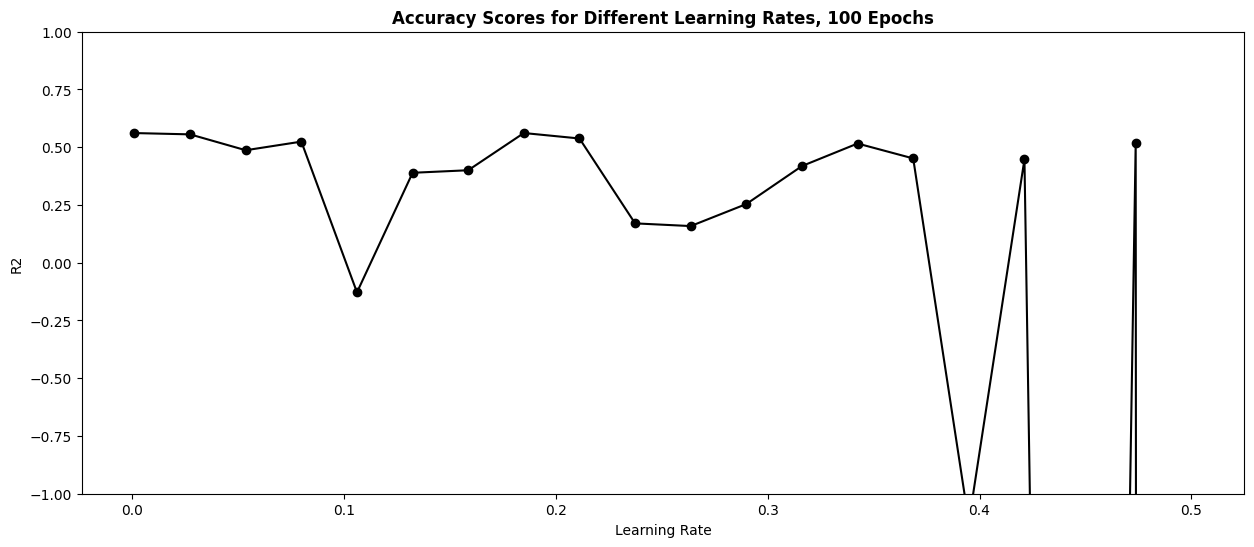

In [90]:
# Plotting the change in R2 across different learning rates
plt.figure(figsize = (15, 6))
plt.plot(learning_rate_values, r2_learning_rate, 'black')
plt.scatter(learning_rate_values, r2_learning_rate, color = 'black')
plt.title("Accuracy Scores for Different Learning Rates, 100 Epochs", fontweight = 'bold')
plt.xlabel("Learning Rate")
plt.ylabel("R2")
plt.ylim(-1, 1)
plt.show()

As the learning rate increases, the model performance stays generally constant, indicating that a low learning rate is sufficient for convergence and accurate predictions. At a learning rate of around 0.4, the R2 value drops significantly; this is likely a consequence of insufficient epochs needed for the model to converge. Moving forward, we will use a learning rate of 0.01 for computational efficiency.

### Linear Regression Implementation (Multiple Features)
*Regression using linear regression with multiple (eight) features*

This section implements the custom linear regression class to predict tumor concavity based on the remaining numeric features denoting tumor characteristics. As before, it carries out the standardization, splitting, model fit, and prediction calculations.

Prior to fitting the linear regression, we normalize the feature data using z-scores for each feature, again calculated using the `preprocessing` package. In this case, the first eight features of the data set are normalized and used in the regression analysis. The data is then split into training (70%) and testing arrays (30%). Finally, a new instance of the linear regression class is created and fit with the training data, then used to predict target values for samples in the testing data.

This linear regression has the following specifications:
- **Method:** Gradient Descent
- **Fit Intercept:** True
- **Epochs:** 100
- **Learning Rate:** 0.01

In [91]:
# Standardizing the data
cancer_data_normal_mult = z_score_standardize(cancer_data_cleaned[:, [0, 1, 2, 3, 4, 5, 7, 8, 9]])
print(f"Standardized feature data (first five rows, first five features): \n {cancer_data_normal_mult[0:5, 0:5]}")

Standardized feature data (first five rows, first five features): 
 [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [92]:
# Splitting the data into training and testing arrays
train_array_mult, test_array_mult, train_targets_mult, test_targets_mult = train_test(cancer_data_normal_mult, cancer_concavity, random_state = 438)

# Verifying sizes of each array
print(f"Shape of training array: {train_array_mult.shape}")
print(f"Shape of training targets: {train_targets_mult.shape}")
print(f"Shape of testing array: {test_array_mult.shape}")
print(f"Shape of testing targets: {test_targets_mult.shape}")

Shape of training array: (398, 9)
Shape of training targets: (398,)
Shape of testing array: (171, 9)
Shape of testing targets: (171,)


In [93]:
# Fitting the model
reg_mult = linear_regression('gradient_descent', epochs = 1000, learning_rate = 0.01)
reg_mult.fit(train_array_mult, train_targets_mult)

# Predicting tumor type based on testing data
prediction_mult = reg_mult.prediction(test_array_mult)

Because the model takes in eight features, there is no way to easily visualize the resulting coefficients and intercept, as was possible with one feature. Instead, model evaluation is done using only the performance metrics.

In [94]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_mult, test_targets_mult, n_features = 8)

Model Metrics 
------------- 
MAE: 0.02 
MSE: 0.00 
RMSE: 0.02 
R2: 0.93 
Adjusted R2: 0.92


This model performs significantly better than the one-feature linear regression, reaching an R2 and adjusted R2 of around 0.90, and with very low mean errors. This indicates that the addition of the other features is more appropriate for regression analyses where the target value is tumor concavity. In addition, it validates the use of the custom linear regression model in multi-feature regression.

### Comparison with Existing Models
*Comparison with scikit-learn linear regression*

In order to ensure that the custom-built linear regression is functioning as intended and providing expected results, it is useful to compare its performance to a linear regression model from established code. In this section, we rerun the analysis with all features using the scikit-learn linear regression to verify the results of the custom MLP.

In [95]:
# Linear regression using sklearn
from sklearn.linear_model import LinearRegression
reg_sk = LinearRegression()
reg_sk.fit(train_array_mult, train_targets_mult)
prediction_sk = reg_sk.predict(test_array_mult)

In [96]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_sk, test_targets_mult, n_features = 8)

Model Metrics 
------------- 
MAE: 0.01 
MSE: 0.00 
RMSE: 0.02 
R2: 0.93 
Adjusted R2: 0.93


The scikit-learn linear regressor produces an R2, adjusted R2, MAE, MSE, and RMSE that is very close to that of the custom-build linear regressor. They are not identical, but the discrepancy is not large enough to indicate an issue in the functioning or implementation of the custom model. Therefore, the custom `rice_ml` linear regressor is able to handle multi-feature regression problems to a professional standard.